prmi00001 (Prathvish Mithare, prathvishmithare7@gmail.com, 7028692):   
sudu00001 (Subrat Kishore Dutta, subratkishoredutta1234@gmail.com, 7028082):  

## Exercise 2.3 PCA for visualization purposes (3 points)

In this exercise you will perform visualization of [MNIST](http://yann.lecun.com/exdb/mnist/) dataset using PCA. The end result of this exercise should look like [Embedding Projector](https://projector.tensorflow.org/) (please select "Mnist with images" in the dropdown menu on the left of the page).  
Write your code in the respective cells. Of course, you can add additional cells or change their order, but please don't significantly change the structure of the notebook. You must use PyTorch tensors to perform all the calculations.  
For each question that requires written answer, please write it in a markdown cell.

In [1]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Loading the data

In [2]:
# Download the dataset and save it to a local folder. You should use the train set.
mnist_dataset = torchvision.datasets.MNIST('data/', train=True, download=True)

X, Y = mnist_dataset.data, mnist_dataset.targets
print(X.shape)

X_flat = X.reshape(-1, 28*28).float()
print(X_flat.shape)

# We must make the data zero-centered before applying PCA
M = torch.mean(X_flat)
X_flat = X_flat - M

torch.Size([60000, 28, 28])
torch.Size([60000, 784])


### 2.2.1. Perform PCA on the input data (1 point)

Calculate covariance matrix of the input data. Hint: You can use torch.matmul for matrix multiplication.

In [3]:
COV = torch.cov(X_flat.T)

#Other way of doing covariance

#X_flat_T = torch.t(X_flat)
#COV = (torch.matmul(X_flat_T, X_flat))

In [4]:
X_flat_T = torch.t(X_flat)
cov_matrix = (torch.matmul(X_flat_T, X_flat))

Perform eigendecomposion of the covariance matrix. Hint: you can use torch.linalg.eig.

In [5]:
lambdas, vectors = torch.linalg.eig(COV)
print((lambdas.shape))
print((vectors.shape))

vectors = vectors.real
lambdas = lambdas.real

pca = torch.matmul(X_flat,vectors)

torch.Size([784])
torch.Size([784, 784])


### 2.2.2 Analyzing the results of PCA (1 point)

Extract the first two principal components of the data, i.e. reduce the dimensionality of the dataset to 2. Plot the result. Different numbers must be represented as different colors on the scatter plot. You can use a randomly sampled portion of the data so that the plot doesn't get cluttered.   
Describe whether it's possible to differentiate the numbers in 2 dimensions. Are there any additional observations?

In [6]:
#sample_size = ...
lists = lambdas.tolist()
sorted_integers = sorted(lists, reverse=True)
a = sorted_integers[0]
b = sorted_integers[1]
c = sorted_integers[2]

In [7]:
ia = lists.index(a)
ib = lists.index(b)
ic = lists.index(c)

In [8]:
ia, ib, ic

(0, 1, 2)

In [9]:
import random
x1 = pca[:,0].tolist()
x2 = pca[:,1].tolist()
x3 = pca[:,2].tolist()
y = Y.tolist()

column1 = []
column2 = []
column3 = []
target = []

for i in range(0,5000):
    ran = random.randint(0,50000)
    column1.append(x1[ran])
    column2.append(x2[ran])
    column3.append(x3[ran])
    target.append(y[ran])


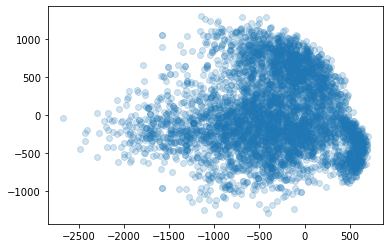

In [10]:
plt.scatter(column1, column2, alpha=0.2)
plt.show()

In [11]:
DataList = []
DataList.append(column1)
DataList.append(column2)
DataList.append(target)
df = pd.DataFrame(DataList).transpose()
df.columns = ['column1','column2', 'target']

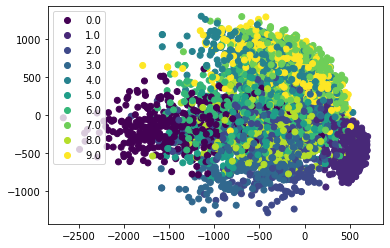

In [12]:
s = plt.scatter(df["column1"], df["column2"], c=df["target"])
plt.legend(s.legend_elements()[0], list(set(df["target"])))
plt.show()


Plot the graph of cumulative explained variance vs number of components. You might also want to make an additional plot for the first N components. How many components should we use to describe the data? Motivate your answer.

Text(0, 0.5, 'cumulative explained variance')

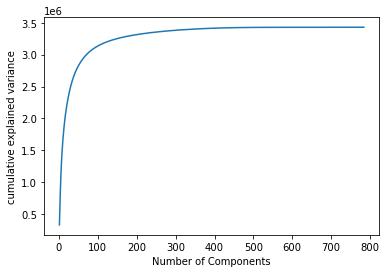

In [13]:
i = [j+1 for j in range(784)]
cumm = []
temp = 0

for j in range(len(lambdas)):
    temp = temp + lambdas[j]
    cumm.append(temp)
    
plt.plot(i, cumm)

plt.xlabel("Number of Components")
plt.ylabel("cumulative explained variance")

Text(0, 0.5, 'cumulative explained variance')

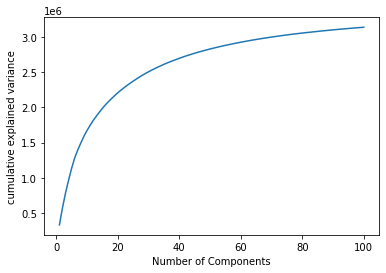

In [14]:
i = [j+1 for j in range(100)]
cumm = []
temp = 0

for j in range(100):
    temp = temp + lambdas[j]
    cumm.append(temp)
    
plt.plot(i, cumm)

plt.xlabel("Number of Components")
plt.ylabel("cumulative explained variance")

The maximum variance in the data can be captured in the initial 100 components.


From the 2D PCA analysis, we can see that '0' and '1' which do not resemble are at the extreme corner of the plot. Similar structured numbers are grouped together

### 2.2.3 Visualizing the data in 3 dimensions (1 point)

Reduce the dimensionality of the dataset to 3. Using Tensorboard visualize the resultant data in 3 dimensions. You should get the result similar to the [Embedding Projector](https://projector.tensorflow.org/) project (actually, they use the same Tensorboard package, so the result might be even exactly the same). You can use differently colored points instead of the digit pictures.

In [15]:
pca_list = []
column1 = x1
column2 = x2
column3 = x3
for i in range(len(column1)):
    zz = []
    zz.append(column1[i])
    zz.append(column2[i])
    zz.append(column3[i])
    pca_list.append(zz)


In [16]:
pca_3d = torch.tensor(pca_list)
pca_3d.shape

torch.Size([60000, 3])

In [17]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

writer.add_embedding(pca_3d)
writer.flush()
writer.close()

In [18]:
%load_ext tensorboard

In [19]:
%tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 22008), started 2:02:39 ago. (Use '!kill 22008' to kill it.)

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

C:\Users\prath\AppData\Local\Temp\ipykernel_2612\3018947711.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


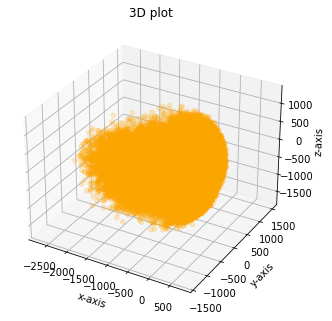

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(column1, column2, column3, color="orange",alpha=0.2)

ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()

Analyze the resultant plot.  
Is 3 dimensions considerably better than 2?  
Which digits stand out in 3D and which digits are difficult to differentiate in 3 dimensions?

ANS: The seperation between the classes is clearly visible in 2D which is not the case in terms of 3D
Digits '0' and '1' stand out in 3D, since they are at the extreams of the graph, digits like '6' and '9' are difficult to differentiate